<a href="https://colab.research.google.com/github/merdogan97/DVwPy/blob/main/DWvPy_Assignment_1_(MatPlotLib)_07_02_2022_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WITH PANDAS AND MATPLOTLIB

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns

import warnings;
warnings.filterwarnings('ignore')

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [ ]:
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kill.isnull()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2531,False,False,False,False,False,True,False,True,False,False,False,False,False,False
2532,False,False,False,False,False,False,False,True,False,False,False,False,False,False
2533,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
kill.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [ ]:
object_col = kill.select_dtypes(include= "object").columns
object_col

Index(['name', 'date', 'manner_of_death', 'armed', 'gender', 'race', 'city',
       'state', 'threat_level', 'flee'],
      dtype='object')

In [ ]:
for col in object_col:
    print(col)
    print("--"*5)
    print(kill[col].value_counts(dropna=False))
    print("--"*10)

name
----------
TK TK              49
Michael Johnson     2
Brandon Jones       2
Eric Harris         2
Michael Brown       2
                   ..
Jack Yantis         1
James Covington     1
Jeremy Mardis       1
Joseph Tyndall      1
Dwayne Jeune        1
Name: name, Length: 2481, dtype: int64
--------------------
date
----------
24/01/17    8
21/12/16    8
07/07/15    8
27/01/16    8
10/02/17    8
           ..
08/01/17    1
16/12/15    1
13/01/17    1
15/12/15    1
27/10/15    1
Name: date, Length: 879, dtype: int64
--------------------
manner_of_death
----------
shot                2363
shot and Tasered     172
Name: manner_of_death, dtype: int64
--------------------
armed
----------
gun                                 1398
knife                                373
vehicle                              177
unarmed                              171
undetermined                         117
                                    ... 
straight edge razor                    1
baseball bat an

In [ ]:
kill[kill.isin(['?'])].any()   

id                         False
name                       False
date                       False
manner_of_death            False
armed                      False
age                        False
gender                     False
race                       False
city                       False
state                      False
signs_of_mental_illness    False
threat_level               False
flee                       False
body_camera                False
dtype: bool

# **1: Plot number of people by gender**

In [ ]:
kill.gender.value_counts()

M    2428
F     107
Name: gender, dtype: int64

In [ ]:
kill.gender.values

array(['M', 'M', 'M', ..., 'M', 'M', 'M'], dtype=object)

In [ ]:
kill.groupby(kill["gender"]).sum().index

Index(['F', 'M'], dtype='object', name='gender')

In [ ]:
# with matplotlib

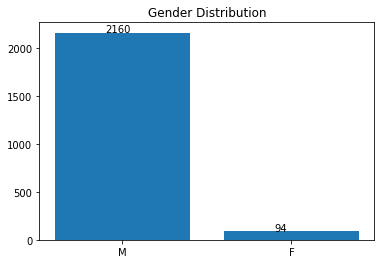

In [ ]:
fig, ax=plt.subplots()
gender = kill.gender.value_counts()
plt.bar(gender.index, gender.values)
for p in ax.patches:
  ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+1))


plt.title('Gender Distribution');

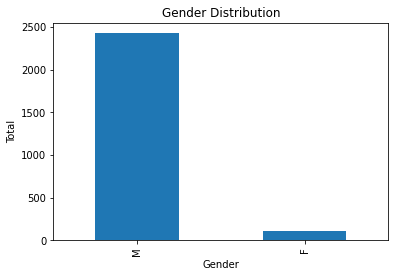

In [ ]:
kill.gender.value_counts().plot.bar()

plt.xlabel("Gender")
plt.ylabel("Total")
plt.title("Gender Distribution");


# **2: Plot 7 most common kill weapons**

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kill.armed.sort_values(ascending=True).head(7)

2039    Taser
2275    Taser
1187    Taser
502     Taser
2443    Taser
933     Taser
1376    Taser
Name: armed, dtype: object

In [ ]:
most_com_weapon = kill.armed.value_counts().head(7)
most_com_weapon

gun             1398
knife            373
vehicle          177
unarmed          171
undetermined     117
toy weapon       104
machete           18
Name: armed, dtype: int64

In [ ]:
# with matplotlib

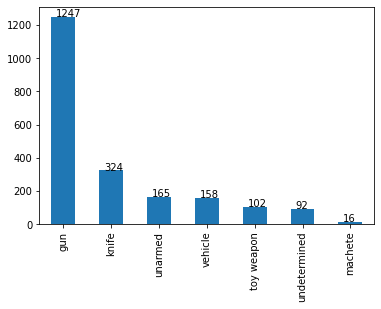

<Figure size 1080x576 with 0 Axes>

In [ ]:
fig, ax=plt.subplots()
kill.armed.value_counts().head(7).plot.bar()
for p in ax.patches:
  ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+2))
plt.figure(figsize=(15,8))
plt.show()

In [ ]:
# with seaborn

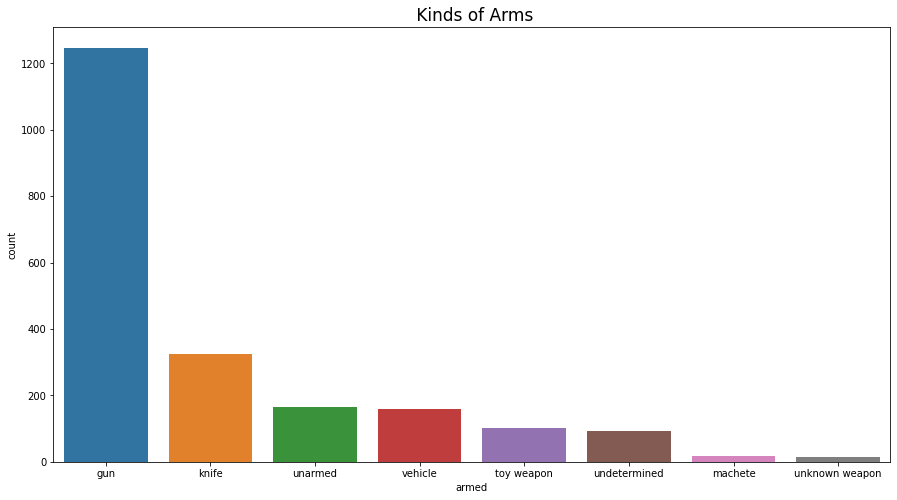

In [ ]:
armed = kill.armed.value_counts(ascending=False)

df_armed = kill.filter(["armed"], axis=1)
df_armed["count"] = 1
grouped_armed = df_armed.groupby("armed", as_index=False, sort=False).sum()
grouped_armed.sort_index(ascending=False)

grouped_armed = grouped_armed.sort_values("count", ascending=False).head(8) 

sns.barplot(data=grouped_armed, x="armed", y="count")

plt.title(" Kinds of Arms", fontsize=17)

plt.show()


# **3: Plot number of age of killed people under two groups : Under 25 and Above 25**

In [ ]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kill.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

In [ ]:
kill.dropna(inplace=True)

In [ ]:
kill.isnull().sum()

id                            0
name                          0
date                          0
manner_of_death               0
armed                         0
age                           0
gender                        0
race                          0
city                          0
state                         0
signs_of_mental_illness       0
threat_level                  0
flee                          0
body_camera                   0
age_cat                    2195
dtype: int64

In [ ]:
kill["age_cat"]=kill.age.apply(lambda x : "above25" if x >=25 else ("below25" if x<25 else "others"))

In [ ]:
conditions  = [ kill['age'] > 25, kill['age'] <= 25 ]
choices     = [ 'above25', 'below25' ]
kill['age_cat'] = np.select(conditions, choices, default=np.nan)

In [ ]:
kill

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,age_cat
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,above25
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,above25
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,below25
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,above25
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,above25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519,2805,Aries Clark,25/07/17,shot,undetermined,16.0,M,B,Marion,AR,False,undetermined,Not fleeing,False,below25
2523,2808,Kesharn K. Burney,26/07/17,shot,vehicle,25.0,M,B,Dayton,OH,False,attack,Car,False,below25
2525,2820,Deltra Henderson,27/07/17,shot,gun,39.0,M,B,Homer,LA,False,attack,Car,False,above25
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.0,M,B,Oshkosh,WI,False,attack,Car,True,above25


In [ ]:
kill.age_cat.value_counts()

above25    1737
below25     517
Name: age_cat, dtype: int64

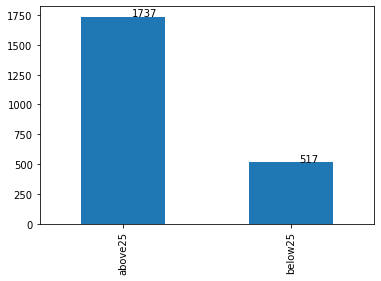

In [ ]:
fig, ax=plt.subplots()
kill.age_cat.value_counts().plot.bar();
for p in ax.patches:
  ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+1))

# **4: Plot number of killed poeple by race**

In [ ]:
# with matplotlib


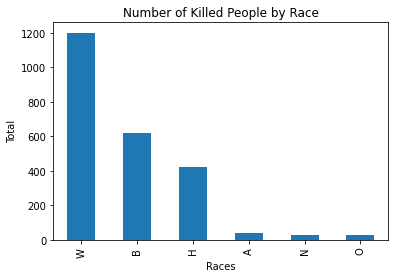

In [ ]:
kill.race.value_counts().plot.bar()

plt.xlabel("Races")
plt.ylabel("Total")
plt.title("Number of Killed People by Race");

# **5: Killed People According to Races (Pie Chart)**

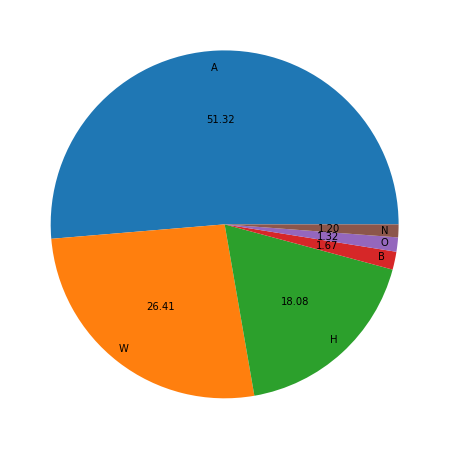

In [ ]:
plt.figure(figsize=(10, 8))

y = kill.race.value_counts()
mylabels = ["A", "W", "H", "B", "O", "N"]
myexplode = [0.1,0,0,0]

plt.pie(y, labels=mylabels, labeldistance=0.9, autopct="%.2f")
plt.show()

# **Problem: missing value on race column.**

# **INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [ ]:
kill.dropna(inplace=True)
kill.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

# **INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [ ]:
# matplotlib

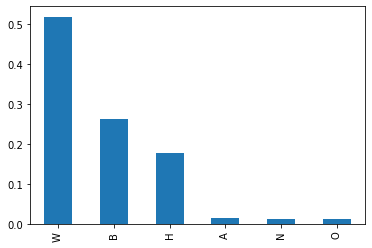

In [ ]:
kill.race.value_counts(dropna= False, normalize= True).plot.bar()

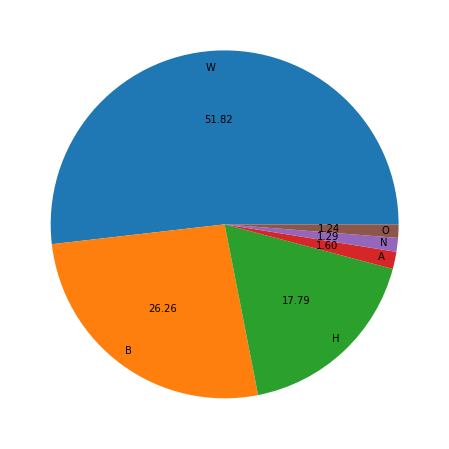

In [ ]:
plt.figure(figsize=(10, 8))

y = kill.race.value_counts(dropna= False, normalize= True)
mylabels = ["W", "B", "H", "A", "N", "O"]
myexplode = [0.1,0,0,0]

plt.pie(y, labels=mylabels, labeldistance=0.9, autopct="%.2f")
plt.show()

In [ ]:
kill["age_cat"] = np.nan
for row in range(len(kill)):
    if kill.age[row] > 25:
        kill["age_cat"][row] = "above25"
    else:
        kill["age_cat"][row] = "below25"